# **Injustice In the Justice System: Analysis of Racial Incarcerations and Releases**


  **Student Name:** Christopher Kiige 

  **Student Number:** 100918296

 **Date:** Monday, November 25th, 2024

## <ins>Introduction</ins>

Injustice remains a widespread issue globally, with significant racial disparities evident in the United States. As a Black man, I am deeply troubled by the pervasive stereotype that Black people, and people of colour in general, are more likely to commit crimes. To explore and address this harmful narrative, I selected the dataset ["*Prison Population in the US*"](www.kaggle.com/datasets/konradb/prison-population-in-the-us/data) by Konrad Banachewicz for analysis.
This dataset offers a detailed overview of prison populations and admission rates in the United States from 2008 to 2020. It categorizes the data by race, including White, Black, Hispanic, Amerindian, Asian, Other, and a broader "non-White" section, enabling a thorough examination of racial disparities within the criminal justice system.

I chose this dataset because it resonates with an issue I care deeply about: confronting systemic biases and injustices against Black individuals. The stereotype that Black people are inherently more prone to criminal behavior not only misrepresents reality but also fuels discriminatory practices such as racial profiling and unjust accusations. These systemic inequities contribute to the overrepresentation of Black individuals in the prison system, despite no evidence to suggest they commit more crimes than other racial groups.

Through this project, I aim to provide a data-driven perspective that can foster a better understanding of these disparities and inspire meaningful conversations around racial justice and equity in law enforcement and incarceration practices.


## <ins>Analysis</ins> 

In [200]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load data from public URL

In [201]:
# Download latest version
path = kagglehub.dataset_download('konradb/prison-population-in-the-us')
print("Path to dataset files:", path)

Path to dataset files: C:\Users\chris\.cache\kagglehub\datasets\konradb\prison-population-in-the-us\versions\1


### Load and Clean The Incarcerated Data
> * Condense Data With Everything After 2008
> * Turn The Years Into The Index
> * Find The Mean of Each Column Then Group Them By Year

In [202]:
# Load incarcerated data
incarcerated = pd.read_csv('populations_states.csv')
# Shrink data to everything after 2008
incarcerated = incarcerated[incarcerated['date'] >= "2008-01-01"]
# Turn the year into the index
incarcerated.index = pd.to_datetime(incarcerated["date"],format='%Y-%m-%d')
# Group each column by year and calculate the mean
incarcerated = incarcerated.groupby(by=[incarcerated.index.year]).agg({'incarcerated_total':'mean', 'incarcerated_white':'mean','incarcerated_black':'mean','incarcerated_hispanic':'mean','incarcerated_amerind':'mean','incarcerated_asian':'mean','incarcerated_other':'mean','incarcerated_nonwhite':'mean'})
incarcerated.index.names = ['Year']
incarcerated


,incarcerated_total,incarcerated_white,incarcerated_black,incarcerated_hispanic,incarcerated_amerind,incarcerated_asian,incarcerated_other,incarcerated_nonwhite
Year,,,,,,,,
2008,29060.430556,12310.725694,12682.278986,5201.192308,285.473958,95.572222,634.339286,16749.704861
2009,28480.703812,11755.768328,12712.917933,5486.122222,266.746939,113.313305,627.291892,16724.935484
2010,28577.370892,11574.359155,12406.214976,6132.402439,339.166667,126.433333,578.878049,17003.011737
2011,33740.696842,14670.240000,14628.384449,5652.393502,509.490305,247.424332,546.512367,19070.456842
2012,31802.821839,14088.402299,13542.933333,4970.710692,527.365672,233.566138,505.077160,17714.419540
2013,30277.790850,12998.019608,12245.780000,5548.411765,501.493590,246.446759,786.754902,17279.771242
2014,30222.901961,13061.802288,12098.975000,5559.556373,519.707265,247.898148,792.530713,17161.099673
2015,29711.439542,12900.839869,11787.608333,5491.387255,528.916667,246.305556,766.352941,16810.599673
2016,28637.482372,12497.844551,11264.941176,5459.377451,517.252083,232.786036,728.880952,16139.637821


### Load and Clean The Released Data
> * Condense Data With Everything After 2008
> * Turn The Years Into The Index
> * Find The Mean of Each Column Then Group Them By Year

In [203]:
# Load released data
admissions = pd.read_csv('admissions_releases_states.csv')
# Shrink data to everything after 2008
admissions = admissions[admissions['date'] >= "2008-01-01"]
# Turn the year into the index
admissions.index = pd.to_datetime(admissions["date"],format='%Y-%m-%d')
# Group each column by year and calculate the mean
releases = admissions.groupby(by=[admissions.index.year]).agg({'admissions_total': 'mean', 'releases_total':'mean', 'releases_white':'mean','releases_black':'mean','releases_hispanic':'mean','releases_amerind':'mean','releases_asian':'mean','releases_other':'mean'})
releases.index.names = ['Year']
releases

,admissions_total,releases_total,releases_white,releases_black,releases_hispanic,releases_amerind,releases_asian,releases_other
Year,,,,,,,,
2008,1075.958333,1103.708333,705.833333,363.083333,7.333333,19.333333,3.416667,4.208333
2009,1037.500000,1055.750000,682.500000,339.500000,7.250000,17.083333,3.250000,4.666667
2010,981.777778,1026.388889,617.694444,280.694444,96.861111,22.527778,4.527778,3.750000
2011,955.888889,954.250000,578.944444,246.833333,99.055556,21.972222,3.944444,3.166667
2012,884.388889,923.444444,579.481481,216.037037,98.203704,16.333333,3.925926,10.351852
2013,874.150000,911.750000,588.500000,207.750000,86.333333,14.750000,3.683333,10.533333
2014,883.000000,875.150000,566.383333,194.966667,83.050000,15.366667,3.516667,11.666667
2015,622.161290,628.245161,399.361290,111.567742,86.606452,19.554839,2.458065,7.600000
2016,682.601093,682.672131,416.180328,123.661202,109.065574,21.475410,4.398907,6.836066


### Creating Graphs

> <ins>**Figure #1**</ins>

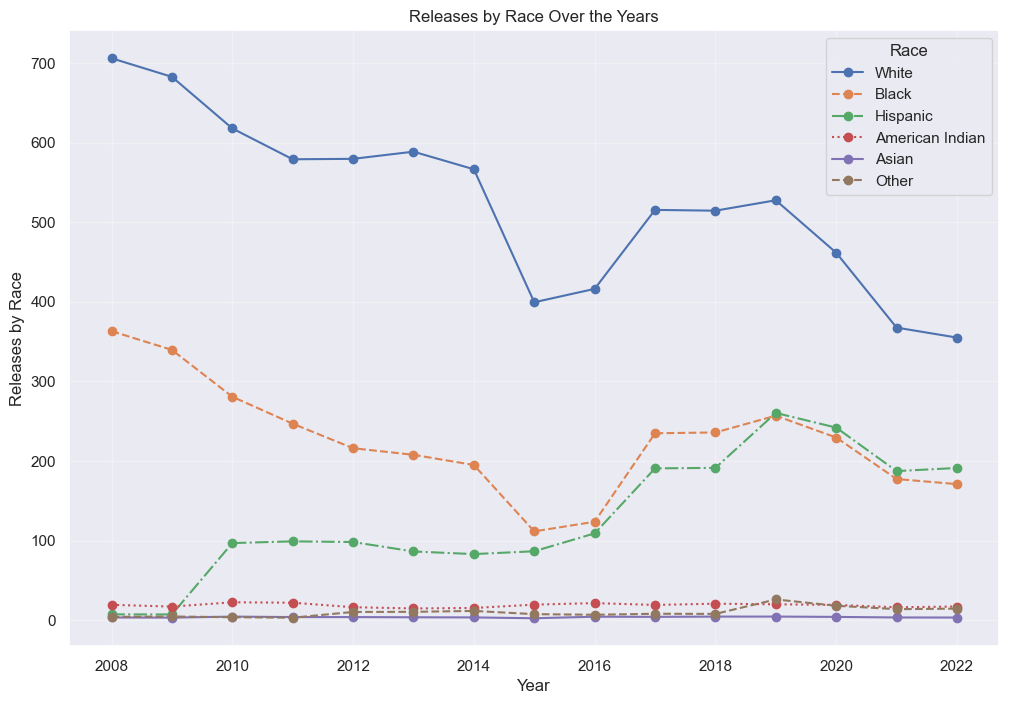

In [204]:
# Set the year back as a column instead of an index
releases = releases.reset_index()

# Plotting
plt.figure(figsize=(12, 8))

# Plot each race column as a line
plt.plot(releases['Year'], releases['releases_white'], label='White', marker='o', linestyle='-')
plt.plot(releases['Year'], releases['releases_black'], label='Black', marker='o', linestyle='--')
plt.plot(releases['Year'], releases['releases_hispanic'], label='Hispanic', marker='o', linestyle='-.')
plt.plot(releases['Year'], releases['releases_amerind'], label='American Indian', marker='o', linestyle=':')
plt.plot(releases['Year'], releases['releases_asian'], label='Asian', marker='o', linestyle='-')
plt.plot(releases['Year'], releases['releases_other'], label='Other', marker='o', linestyle='--')

# Customize the chart
plt.xlabel('Year')
plt.ylabel('Releases by Race')
plt.title('Releases by Race Over the Years')
plt.legend(title='Race')
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()


> <ins>**Figure #2**</ins>

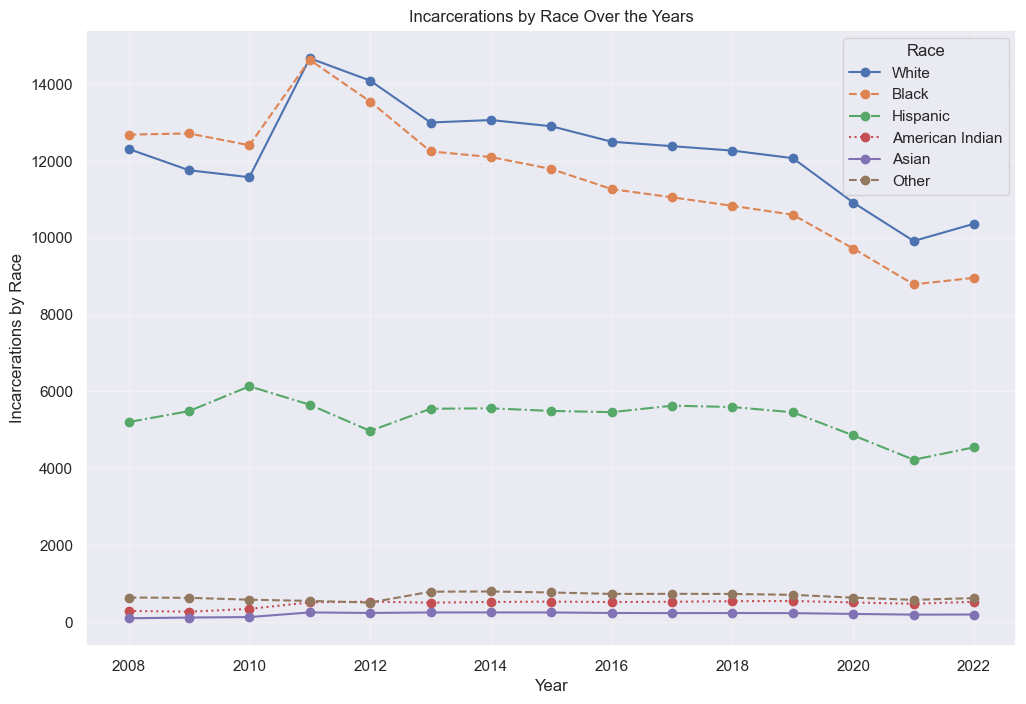

In [205]:
# Set the year back as a column instead of an index
incarcerated = incarcerated.reset_index()

# Plotting
plt.figure(figsize=(12, 8))

# Plot each race column as a line
plt.plot(incarcerated['Year'], incarcerated['incarcerated_white'], label='White', marker='o', linestyle='-')
plt.plot(incarcerated['Year'], incarcerated['incarcerated_black'], label='Black', marker='o', linestyle='--')
plt.plot(incarcerated['Year'], incarcerated['incarcerated_hispanic'], label='Hispanic', marker='o', linestyle='-.')
plt.plot(incarcerated['Year'], incarcerated['incarcerated_amerind'], label='American Indian', marker='o', linestyle=':')
plt.plot(incarcerated['Year'], incarcerated['incarcerated_asian'], label='Asian', marker='o', linestyle='-')
plt.plot(incarcerated['Year'], incarcerated['incarcerated_other'], label='Other', marker='o', linestyle='--')

# Customize the chart
plt.xlabel('Year')
plt.ylabel('Incarcerations by Race')
plt.title('Incarcerations by Race Over the Years')
plt.legend(title='Race')
plt.grid(True, alpha=0.3)

# Show the plot
plt.show()

> <ins>**Figure #3**</ins>

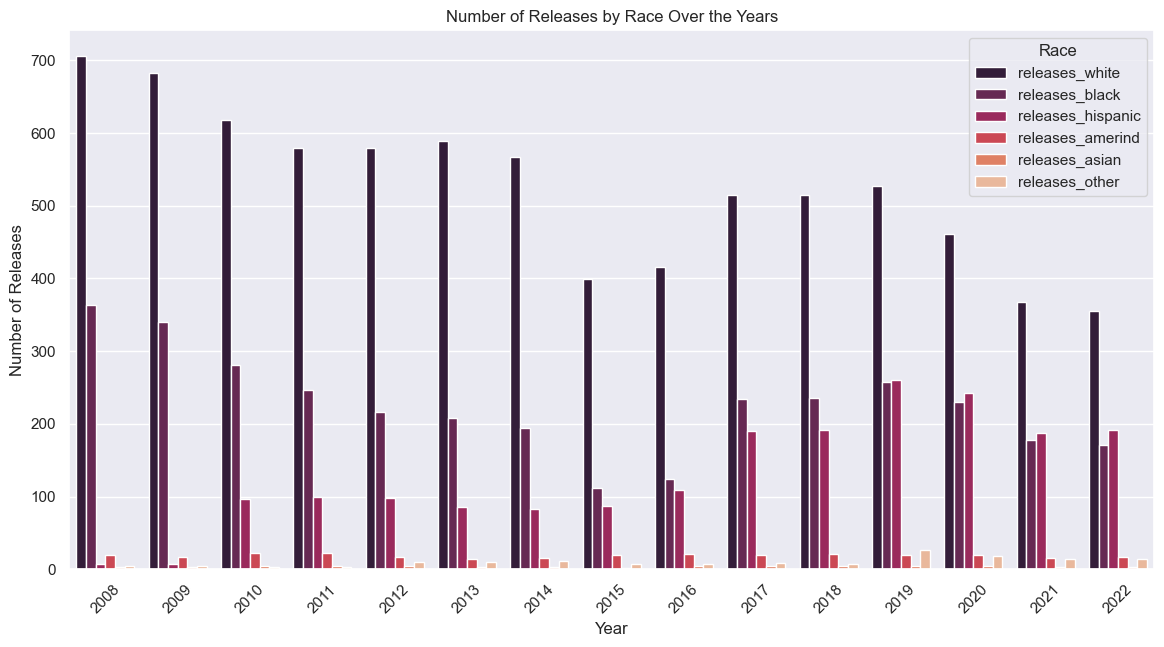

In [206]:
# Melt the dataset to long format 
data_melted = pd.melt(releases, id_vars=['Year'], value_vars=['releases_white', 'releases_black', 'releases_hispanic', 'releases_amerind', 'releases_asian', 'releases_other'], var_name='Race', value_name='Releases') 
# Set the style for the plot 
sns.set(style="darkgrid") 
# Create the grouped bar graph 
plt.figure(figsize=(14, 7)) 
sns.barplot(x='Year', y='Releases', palette="rocket", hue='Race', data=data_melted) 
# Add labels and title 
plt.xlabel('Year') 
plt.ylabel('Number of Releases') 
plt.title('Number of Releases by Race Over the Years') 
# Rotate x-axis labels for better readability 
plt.xticks(rotation=45) 
# Show the plot 
plt.show()

> <ins>**Figure #4**</ins>

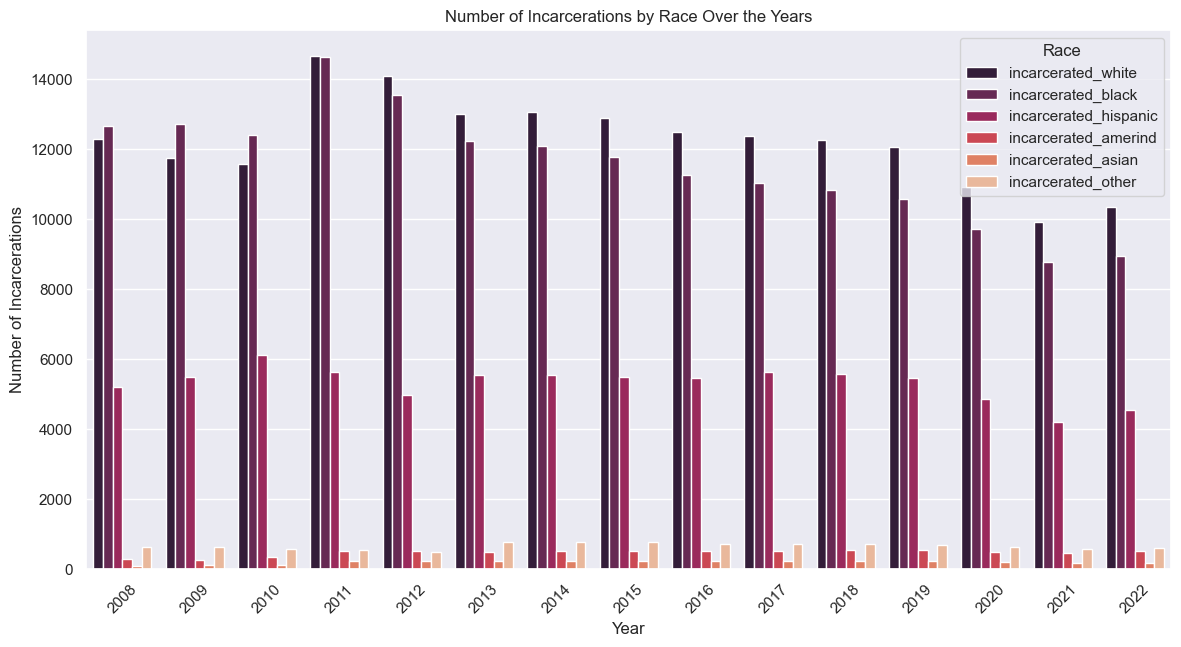

In [207]:
# Melt the dataset to long format 
data_melted = pd.melt(incarcerated, id_vars=['Year'], value_vars=['incarcerated_white', 'incarcerated_black', 'incarcerated_hispanic', 'incarcerated_amerind', 'incarcerated_asian', 'incarcerated_other'], var_name='Race', value_name='Incarceration') 
# Set the style for the plot 
sns.set(style="darkgrid") 
# Create the grouped bar graph 
plt.figure(figsize=(14, 7)) 
sns.barplot(x='Year', y='Incarceration', palette="rocket", hue='Race', data=data_melted) 
# Add labels and title 
plt.xlabel('Year') 
plt.ylabel('Number of Incarcerations') 
plt.title('Number of Incarcerations by Race Over the Years')

# Rotate x-axis labels for better readability 
plt.xticks(rotation=45) 
# Show the plot 
plt.show()

> <ins>**Figure #5**</ins>

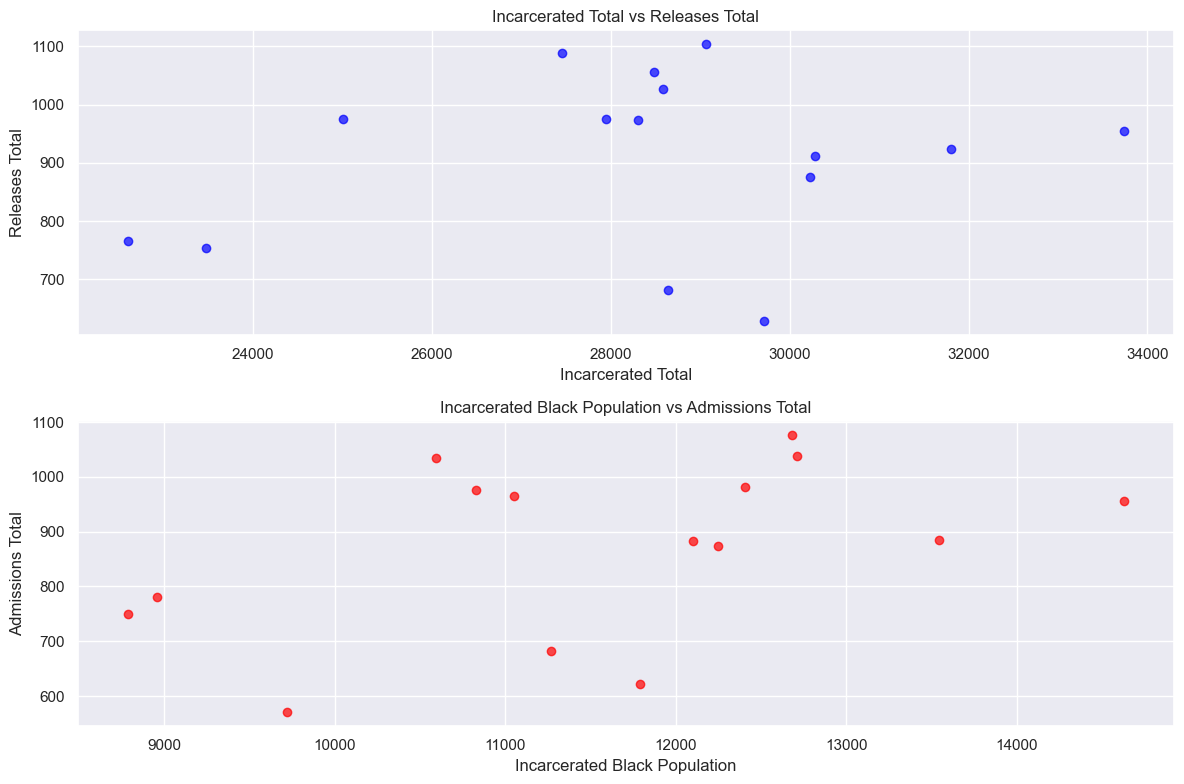

In [208]:
# Merge the datasets on the 'Year' column
df = pd.merge(incarcerated, releases, on="Year")

# Plot scatterplots
plt.figure(figsize=(12, 8))

# Scatterplot for incarcerated_total vs releases_total
plt.subplot(2, 1, 1)
plt.scatter(df["incarcerated_total"], df["releases_total"], color="blue", alpha=0.7)
plt.title("Incarcerated Total vs Releases Total")
plt.xlabel("Incarcerated Total")
plt.ylabel("Releases Total")

# Scatterplot for incarcerated_black vs admissions_total
plt.subplot(2, 1, 2)
plt.scatter(df["incarcerated_black"], df["admissions_total"], color="red", alpha=0.7)
plt.title("Incarcerated Black Population vs Admissions Total")
plt.xlabel("Incarcerated Black Population")
plt.ylabel("Admissions Total")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

> <ins>**Figure #6**</ins>

Text(0.5, 1.0, 'Total Incarcerations by Race (2008-2022)')

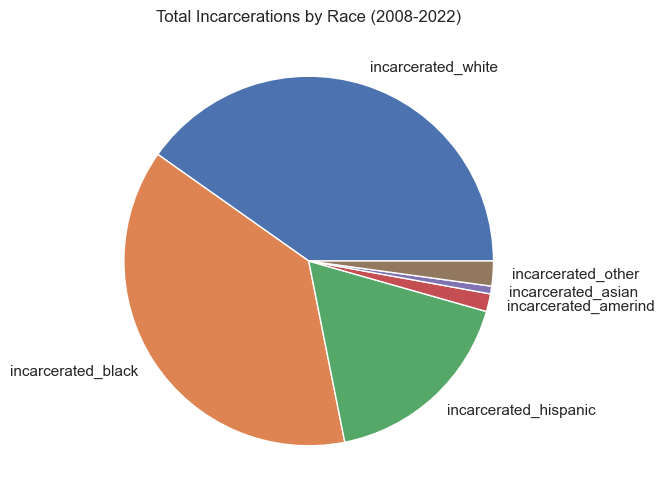

In [209]:
# Calculate the total incarcerations for each race over all years 
race_totals = df[['incarcerated_white', 'incarcerated_black', 'incarcerated_hispanic', 'incarcerated_amerind', 'incarcerated_asian', 'incarcerated_other']].sum() 
# Plotting the pie chart 
plt.figure(figsize=(10, 6)) 
plt.pie(race_totals, labels=race_totals.index) 
plt.title('Total Incarcerations by Race (2008-2022)')

### Extra Info

In [210]:
print("Release Total Mean: ")
print(f"{releases['releases_total'].mean():.2f}")

Release Total Mean: 
912.91


In [211]:
print("Incarcerated Total Mean: ")
print(f"{incarcerated['incarcerated_total'].mean():.2f}")

Incarcerated Total Mean: 
28352.40


In [212]:
print("Percent of Non-White People Released Per Year: ")
non_white_releases =((releases['releases_black'].mean() + releases['releases_hispanic'].mean() + releases['releases_amerind'].mean() + releases['releases_asian'].mean() + releases['releases_other'].mean())/incarcerated['incarcerated_nonwhite'].mean()) * 100
print(f"{non_white_releases:.1f}%")

Percent of Non-White People Released Per Year: 
2.4%


In [213]:
print("Percent of White People Released Per Year: ")
white_releases = (releases['releases_white'].mean()/incarcerated['incarcerated_white'].mean()) * 100
print(f"{white_releases:.1f}%")

Percent of White People Released Per Year: 
4.3%


## <ins>Discussion</ins>

When examining *Figure #4*, the data reveals that, on average, the majority of incarcerations involve white people. This aligns with population realities, as white people constitute the largest racial group in the United States. However, the graph also highlights a notable trend. The incarceration rates for Black people are not far behind those of white people. In 2013, for instance, the number of incarcerations among white individuals (12,998.02) was nearly equal to that of Black individuals (12,245.78). This close of a range in the groups, despite the significant difference in population size between them, raises questions about the justice system and its inherent biases.

Further insights can be drawn from *Figure #2*. During the early 2000s, Black people were incarcerated at a higher rate compared to white people. As the years progressed, white people begin to widen gap and gain the lead between the two groups. In my personal opinion, it would be unreasonable to assume that such trends result from a sudden and collective behavioral shift within Black communities or a random decline in criminal activity. Instead, a plausible explanation lies in the prevalence of racial profiling during earlier decades, which may have declined in more recent years.

An analysis of the data concerning releases, as illustrated in *Figures #1* and *Figure #3*, reveals another layer of disparity. Across all racial groups, white individuals are released from incarceration at the highest rates. This observation is again consistent with demographic proportions, given the larger representation of white individuals within the general population. However, examining the gaps between racial groups over time provides a more nuanced understanding. In earlier years, the gap between the group with the highest release rates and the second highest was substantial. As time progressed, this gap began to narrow, suggesting a potential shift toward more equitable judicial practices.

Another key observation relates to the annual release percentages. On average, approximately 4.3% of white individuals are released per year, compared to about 2.4% of non-white individuals. This difference implies that white individuals are released at a rate approximately 1.7 times higher than all other racial groups combined. Such a disproportionate statistic raises concerns about systemic bias within the justice system. If this disparity does not reflect an underlying prejudice, then I do not know what does.

In conclusion, while it cannot be definitively stated that all individuals of colour are incarcerated solely due to prejudice, the data strongly indicates the existence of racial bias within the justice system. These patterns underscore the need for greater awareness and action to address and mitigate prejudice in courtrooms and correctional policies. Recognizing and addressing these disparities is essential for fostering a more just and equitable legal system.



## <ins>References</ins>

Banachewicz, Konrad. “Prison Population in the US.” Kaggle, 10 May 2023, [Kaggle/konradb/prison-population-in-the-us](www.kaggle.com/datasets/konradb/prison-population-in-the-us/data). 

Bhutani, Karti. “Python: Pandas.To_datetime().” GeeksforGeeks, GeeksforGeeks, 4 Dec. 2023, [www.geeksforgeeks.org/python-pandas-to_datetime/](www.geeksforgeeks.org/python-pandas-to_datetime/). 

Kushwaha, Hardik. “Data Visualization in Jupyter Notebook.” GeeksforGeeks, GeeksforGeeks, 26 Sept. 2023, [www.geeksforgeeks.org/data-visualization-in-jupyter-notebook/](www.geeksforgeeks.org/data-visualization-in-jupyter-notebook/). 

Shelef, Lidor Eliyahu. “How to Group Data by Multiple Columns in Pandas?” Stack Overflow, 1 Mar. 1968, [stackoverflow.com/questions/75280170/how-to-group-data-by-multiple-columns-in-pandas](stackoverflow.com/questions/75280170/how-to-group-data-by-multiple-columns-in-pandas). 

Waskom, Micheal. “Example Gallery#.” Example Gallery - Seaborn 0.12.2 Documentation, 2022, [seaborn.pydata.org/archive/0.12/examples/index.html](seaborn.pydata.org/archive/0.12/examples/index.html). 

"Can you find better words population, people, image, group and racial groups". ChatGPT, GPT-4, OpenAI, 23 Nov. 2024, [chat.openai.com/chat](chat.openai.com/chat).

"Does this sentence sound good?". ChatGPT, GPT-4, OpenAI, 24 Nov. 2024, [chat.openai.com/chat](chat.openai.com/chat).

"Why doesn't my bar graph work?". ChatGPT, GPT-4, OpenAI, 24 Nov. 2024, [chat.openai.com/chat](chat.openai.com/chat).

